In [14]:
import pandas as pd
import numpy as np
from siuba import *
from siuba.dply.vector import *
from plotnine import *
import os 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

os.chdir("C:\\Users\\Usuario\\Documents\\scidata\\24_cdd_py\\practicas\\mamiferos")
sp = pd.read_csv('msleep.csv')

Cambia el nombre de cada columna a su traducción en español.

In [15]:
sp = (sp >> rename(nombre = "name",
                   genero = "genus",
                   dieta = "vore",
                   orden = "order",
                   conservacion = "conservation",
                   horas_sueño = "sleep_total",
                   horas_rem = "sleep_rem",
                   ciclo_sueño = "sleep_cycle",
                   horas_despierto = "awake",
                   masa_cerebral = "brainwt",
                   masa_corporal = "bodywt")
     )

In [6]:
sp

,nombre,genero,dieta,orden,conservacion,horas_sueño,horas_rem,ciclo_sueño,horas_despierto,masa_cerebral,masa_corporal
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380


In [16]:
# Ordena la tabla alaféticamente por dieta, orden y nombre, y muestra el género de los tres primeros renglones.

sp >> arrange(_.dieta,_.orden,_.nombre) >> select(_.genero) >> head(3)


,genero
81,Vulpes
58,Phoca
0,Acinonyx


In [21]:
# ¿Cuál es la dieta más común en la tabla? ¿Cuántos omnívoros hay?

sp >> group_by(_.dieta) >> summarize(total_dieta = n(_)) >> arrange(-_.total_dieta)


,dieta,total_dieta
1,herbi,32
3,omni,20
0,carni,19
4,NaN,7
2,insecti,5


In [28]:
# Eduardo
sp >> group_by(_.dieta) >> summarize(total = _.dieta.count()) 

,dieta,total
0,carni,19
1,herbi,32
2,insecti,5
3,omni,20
4,NaN,0


In [27]:
# ¿Cuántos omnívoros hay?

#sp >> group_by(_.dieta) >> summarize(total = _.dieta.count()) >> filter(_.dieta == "omni")
sp >> group_by(_.dieta) >> summarize(total = _.dieta.count()) >> filter(_.dieta == "omni")

,dieta,total
3,omni,20


**Tarea**

¿Cuál es el orden más común en la tabla?  ¿Hay más carnívora que primates?


In [30]:
# ¿Cuáles son los primates que más y menos duermen?

sp >> filter(_.orden == "Primates") >> arrange(_.horas_sueño) 

,nombre,genero,dieta,orden,conservacion,horas_sueño,horas_rem,ciclo_sueño,horas_despierto,masa_cerebral,masa_corporal
33,Human,Homo,omni,Primates,NaN,8.0,1.9,1.500000,16.0,1.3200,62.000
53,Baboon,Papio,omni,Primates,NaN,9.4,1.0,0.666667,14.6,0.1800,25.235
34,Mongoose lemur,Lemur,herbi,Primates,vu,9.5,0.9,NaN,14.5,NaN,1.670
65,Squirrel monkey,Saimiri,omni,Primates,NaN,9.6,1.4,NaN,14.4,0.0200,0.743
49,Chimpanzee,Pan,omni,Primates,NaN,9.7,1.4,1.416667,14.3,0.4400,52.200
28,Galago,Galago,omni,Primates,NaN,9.8,1.1,0.550000,14.2,0.0050,0.200
12,Grivet,Cercopithecus,omni,Primates,lc,10.0,0.7,NaN,14.0,NaN,4.750
37,Macaque,Macaca,omni,Primates,NaN,10.1,1.2,0.750000,13.9,0.1790,6.800
25,Patas monkey,Erythrocebus,omni,Primates,lc,10.9,1.1,NaN,13.1,0.1150,10.000
44,Slow loris,Nyctibeus,carni,Primates,NaN,11.0,NaN,NaN,13.0,0.0125,1.400


In [34]:
sp >> filter(_.orden == "Primates") >> summarize(max_sueño = _.horas_sueño.max(),min_sueño = _.horas_sueño.min())

,max_sueño,min_sueño
0,17.0,8.0


In [36]:
(
sp >> 
    filter(_.orden == "Primates") >> 
    filter((_.horas_sueño == _.horas_sueño.max()) | (_.horas_sueño == _.horas_sueño.min()))
)

,nombre,genero,dieta,orden,conservacion,horas_sueño,horas_rem,ciclo_sueño,horas_despierto,masa_cerebral,masa_corporal
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.0155,0.48
33,Human,Homo,omni,Primates,NaN,8.0,1.9,1.5,16.0,1.3200,62.00


In [41]:
(
sp >> 
    group_by(_.orden) >> 
    filter((_.horas_sueño == _.horas_sueño.max()) | (_.horas_sueño == _.horas_sueño.min())) >>
    arrange(_.orden,_.horas_sueño)
)

,nombre,genero,dieta,orden,conservacion,horas_sueño,horas_rem,ciclo_sueño,horas_despierto,masa_cerebral,masa_corporal
77,Tenrec,Tenrec,omni,Afrosoricida,NaN,15.6,2.3,NaN,8.40,0.00260,0.900
29,Giraffe,Giraffa,herbi,Artiodactyla,cd,1.9,0.4,NaN,22.10,NaN,899.995
73,Pig,Sus,omni,Artiodactyla,domesticated,9.1,2.4,0.500000,14.90,0.18000,86.250
58,Caspian seal,Phoca,carni,Carnivora,vu,3.5,0.4,NaN,20.50,NaN,86.000
50,Tiger,Panthera,carni,Carnivora,en,15.8,NaN,NaN,8.20,NaN,162.564
30,Pilot whale,Globicephalus,carni,Cetacea,cd,2.7,0.1,NaN,21.35,NaN,800.000
59,Common porpoise,Phocoena,carni,Cetacea,vu,5.6,NaN,NaN,18.45,NaN,53.180
21,Big brown bat,Eptesicus,insecti,Chiroptera,lc,19.7,3.9,0.116667,4.30,0.00030,0.023
42,Little brown bat,Myotis,insecti,Chiroptera,NaN,19.9,2.0,0.200000,4.10,0.00025,0.010
17,Long-nosed armadillo,Dasypus,carni,Cingulata,lc,17.4,3.1,0.383333,6.60,0.01080,3.500


In [ ]:
# # ¿Qué resultado esperarías obtener si sumas las horas de sueño con las horas despierto en cada renglón?
# Calcula una nueva columna llamada "total_despierto_dormido" que sea esta suma.

In [42]:
sp.columns

Index(['nombre', 'genero', 'dieta', 'orden', 'conservacion', 'horas_sueño',
       'horas_rem', 'ciclo_sueño', 'horas_despierto', 'masa_cerebral',
       'masa_corporal'],
      dtype='object')

In [45]:
# Añade el porcentaje de masa que representa el cerebro respecto del cuerpo de cada animal y responde:

sp = sp >> mutate(per_br_bd = _.masa_cerebral*100/_.masa_corporal)


In [46]:
sp

,nombre,genero,dieta,orden,conservacion,horas_sueño,horas_rem,ciclo_sueño,horas_despierto,masa_cerebral,masa_corporal,per_br_bd
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.90,NaN,50.000,NaN
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.00,0.01550,0.480,3.229167
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.60,NaN,1.350,NaN
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.10,0.00029,0.019,1.526316
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.00,0.42300,600.000,0.070500
5,Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4,2.2,0.766667,9.60,NaN,3.850,NaN
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7,1.4,0.383333,15.30,NaN,20.490,NaN
7,Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0,NaN,NaN,17.00,NaN,0.045,NaN
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.90,0.07000,14.000,0.500000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.00,0.09820,14.800,0.663514


In [ ]:
#### ¿Qué animales tienen el mayor y menor porcentaje de masa cerebral respecto a la corporal?

In [ ]:
#### ¿Cuántos animales tienen dicho porcentaje mayor al del humano?

In [51]:
per_human = (sp >> filter(_.nombre == "Human") >> select(_.per_br_bd)).iloc[0,0]
per_human

2.129032258064516

In [53]:
sp >> filter(_.per_br_bd > per_human) >> n(_)

9

In [82]:
# Añade una columna que indique si el animal duerme 8 o menos horas.
# np.where(condicion,en caso de cumplir, en caso de no cumplir)

sp = sp >> mutate(duerme_bien = _.horas_sueño >= 8)
sp

,nombre,genero,dieta,orden,conservacion,horas_sueño,horas_rem,ciclo_sueño,horas_despierto,masa_cerebral,masa_corporal,per_br_bd,duerme_bien
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.90,NaN,50.000,NaN,True
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.00,0.01550,0.480,3.229167,True
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.60,NaN,1.350,NaN,True
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.10,0.00029,0.019,1.526316,True
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.00,0.42300,600.000,0.070500,False
5,Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4,2.2,0.766667,9.60,NaN,3.850,NaN,True
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7,1.4,0.383333,15.30,NaN,20.490,NaN,True
7,Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0,NaN,NaN,17.00,NaN,0.045,NaN,False
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.90,0.07000,14.000,0.500000,True
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.00,0.09820,14.800,0.663514,False


In [87]:
# Crea un gráfico de barras donde se indique cuántos animales de cada dieta tienen mayor relación cerebro/cuerpo respecto 
# de los humanos, separando por orden.

sp_respuesta = sp >> filter(_.per_br_bd > per_human) 
sp_respuesta

,nombre,genero,dieta,orden,conservacion,horas_sueño,horas_rem,ciclo_sueño,horas_despierto,masa_cerebral,masa_corporal,per_br_bd,duerme_bien
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480,3.229167,True
16,Lesser short-tailed shrew,Cryptotis,omni,Soricomorpha,lc,9.1,1.4,0.150000,14.9,0.00014,0.005,2.800000,True
28,Galago,Galago,omni,Primates,NaN,9.8,1.1,0.550000,14.2,0.00500,0.200,2.500000,True
37,Macaque,Macaca,omni,Primates,NaN,10.1,1.2,0.750000,13.9,0.17900,6.800,2.632353,True
42,Little brown bat,Myotis,insecti,Chiroptera,NaN,19.9,2.0,0.200000,4.1,0.00025,0.010,2.500000,True
65,Squirrel monkey,Saimiri,omni,Primates,NaN,9.6,1.4,NaN,14.4,0.02000,0.743,2.691790,True
68,Mole rat,Spalax,NaN,Rodentia,NaN,10.6,2.4,NaN,13.4,0.00300,0.122,2.459016,True
70,Thirteen-lined ground squirrel,Spermophilus,herbi,Rodentia,lc,13.8,3.4,0.216667,10.2,0.00400,0.101,3.960396,True
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104,2.403846,True


In [92]:
sp_respuesta

,nombre,genero,dieta,orden,conservacion,horas_sueño,horas_rem,ciclo_sueño,horas_despierto,masa_cerebral,masa_corporal,per_br_bd,duerme_bien
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480,3.229167,True
16,Lesser short-tailed shrew,Cryptotis,omni,Soricomorpha,lc,9.1,1.4,0.150000,14.9,0.00014,0.005,2.800000,True
28,Galago,Galago,omni,Primates,NaN,9.8,1.1,0.550000,14.2,0.00500,0.200,2.500000,True
37,Macaque,Macaca,omni,Primates,NaN,10.1,1.2,0.750000,13.9,0.17900,6.800,2.632353,True
42,Little brown bat,Myotis,insecti,Chiroptera,NaN,19.9,2.0,0.200000,4.1,0.00025,0.010,2.500000,True
65,Squirrel monkey,Saimiri,omni,Primates,NaN,9.6,1.4,NaN,14.4,0.02000,0.743,2.691790,True
68,Mole rat,Spalax,NaN,Rodentia,NaN,10.6,2.4,NaN,13.4,0.00300,0.122,2.459016,True
70,Thirteen-lined ground squirrel,Spermophilus,herbi,Rodentia,lc,13.8,3.4,0.216667,10.2,0.00400,0.101,3.960396,True
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104,2.403846,True


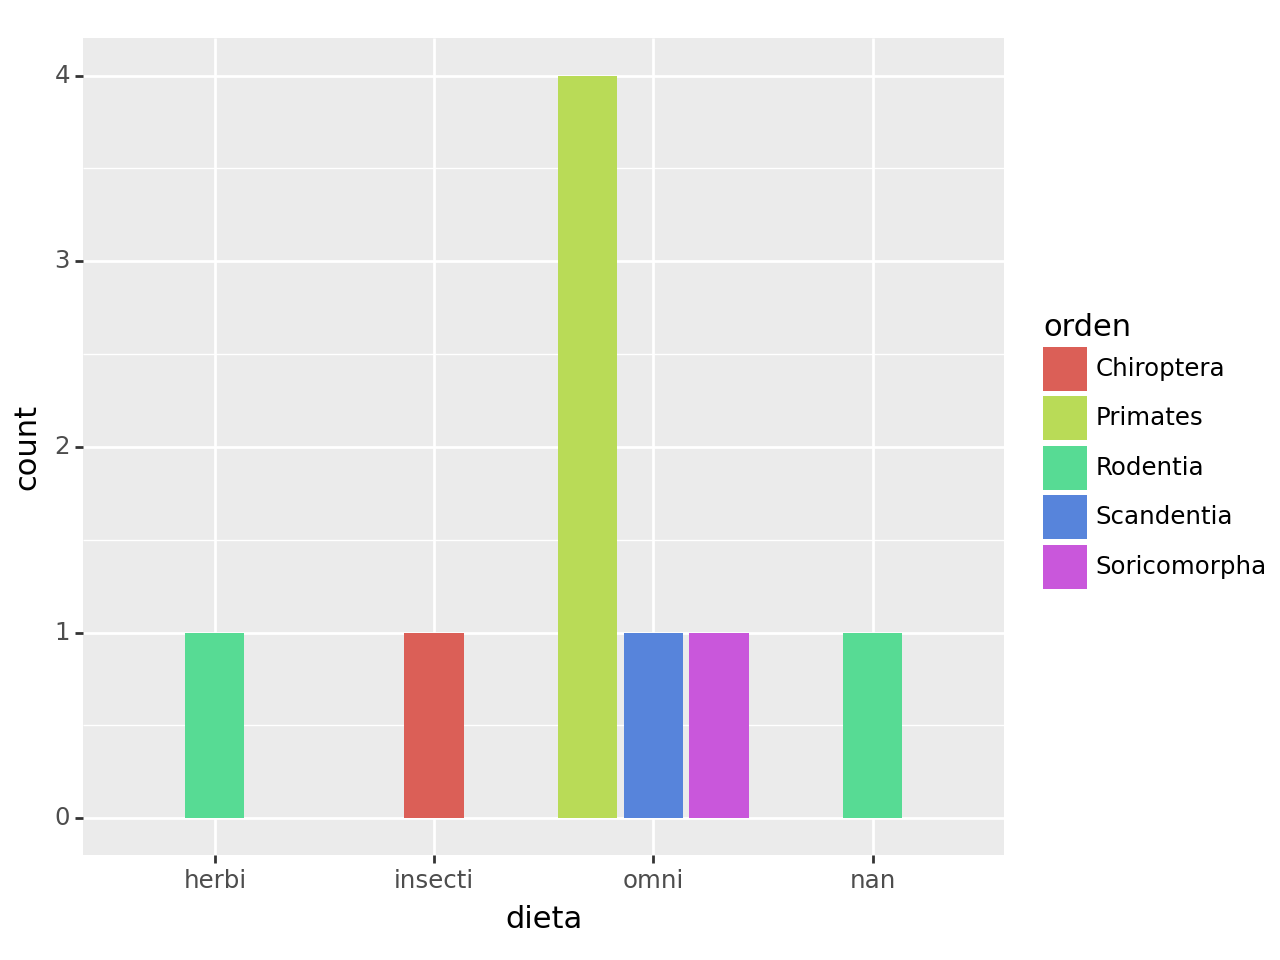

<Figure Size: (640 x 480)>

In [96]:
ggplot() + geom_bar(data=sp_respuesta,mapping=aes(x="dieta",fill="orden"),
                   position = position_dodge2(preserve = "single"))

In [86]:
sp >> filter(_.horas_sueño > 8,_.per_br_bd >per_human)

,nombre,genero,dieta,orden,conservacion,horas_sueño,horas_rem,ciclo_sueño,horas_despierto,masa_cerebral,masa_corporal,per_br_bd,duerme_bien
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480,3.229167,True
16,Lesser short-tailed shrew,Cryptotis,omni,Soricomorpha,lc,9.1,1.4,0.150000,14.9,0.00014,0.005,2.800000,True
28,Galago,Galago,omni,Primates,NaN,9.8,1.1,0.550000,14.2,0.00500,0.200,2.500000,True
37,Macaque,Macaca,omni,Primates,NaN,10.1,1.2,0.750000,13.9,0.17900,6.800,2.632353,True
42,Little brown bat,Myotis,insecti,Chiroptera,NaN,19.9,2.0,0.200000,4.1,0.00025,0.010,2.500000,True
65,Squirrel monkey,Saimiri,omni,Primates,NaN,9.6,1.4,NaN,14.4,0.02000,0.743,2.691790,True
68,Mole rat,Spalax,NaN,Rodentia,NaN,10.6,2.4,NaN,13.4,0.00300,0.122,2.459016,True
70,Thirteen-lined ground squirrel,Spermophilus,herbi,Rodentia,lc,13.8,3.4,0.216667,10.2,0.00400,0.101,3.960396,True
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104,2.403846,True
